# Final Assignment

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

### Part 1

The `food_consumption.csv` dataset from the `data` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [ ]:
food = pd.read_csv('/content/food_consumption.csv')
food

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?**

In [ ]:
food.groupby('food_category').consumption.describe()

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [ ]:
print("The 'food_category' with the highest median value of 'food_consumption' is:",
      food.groupby('food_category').consumption.median().nlargest(1).index[0])

The 'food_category' with the highest median value of 'food_consumption' is dairy


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

[Text(0.5, 1.0, 'CO2 emission by Food Cathegory'),
 Text(0.5, 0, 'CO2 emission'),
 Text(0, 0.5, 'Food Cathegory')]

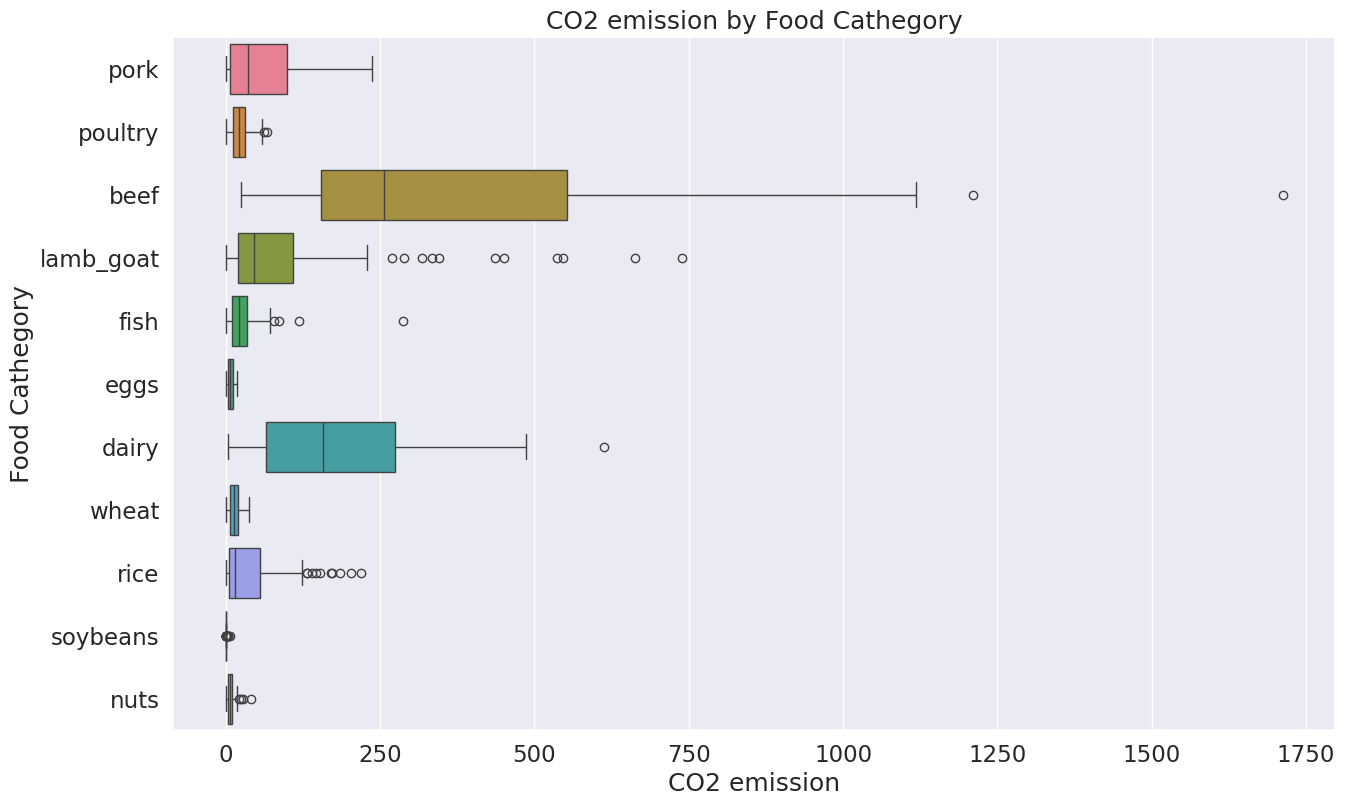

In [ ]:
sns.boxplot(x='co2_emission',
            y='food_category',
            data=food,
            hue='food_category').set(title='CO2 emission by Food Cathegory',
                                     xlabel='CO2 emission',
                                     ylabel='Food Cathegory')

In [ ]:
print("The 'food_category' with the highest iqr value of 'co2_emission' is:",
      food.groupby('food_category')['co2_emission'].apply(sci.stats.iqr).nlargest(1).index[0])

The 'food_category' with the highest iqr value of 'co2_emission' is beef


3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value?

In [ ]:
print("The 'food_category' with the highest median value of 'co2_emission' is:",
      food.groupby('food_category')['co2_emission'].median().nlargest(1).index[0])

The 'food_category' with the highest median value of 'co2_emission' is beef


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why.

In [ ]:
# Verify the values of average consumption for poulrty and fish cathegories
food[(food.food_category == 'poultry') | (food.food_category == 'fish')].groupby('food_category')['consumption'].mean()

,consumption
food_category,
fish,17.287077
poultry,21.219231


In [ ]:
# Formulate the null hypothesis (H0) → "There is no difference between the mean of 'poultry' food consumption and the mean of 'fish' food consumption"
# Define the significance level alpha
alpha = 0.05
# Extract the data, filtered by 'food_category'
food_poultry = food[food.food_category == 'poultry'].consumption
food_fish = food[food.food_category == 'fish'].consumption
# Claculate the means and the means difference → test statistic
mu_poultry = np.mean(food_poultry)
mu_fish = np.mean(food_fish)
mu_diff = mu_poultry - mu_fish
print(mu_diff)

3.9321538461538488


In [ ]:
# Create a new database containing the two datasets to be tested
food1 = pd.DataFrame({'group': ['poultry' if el <= len(food_poultry) else 'fish' for el in range(1,(len(food_fish)*2)+1)],
                   'consumption': pd.concat([food_poultry, food_fish], ignore_index=True)})
food1

,group,consumption
0,poultry,38.66
1,poultry,46.12
2,poultry,13.23
3,poultry,26.87
4,poultry,34.98
...,...,...
255,fish,32.03
256,fish,24.92
257,fish,25.65
258,fish,4.13


In [ ]:
# Permutation test:

# Define number of iterations and initialize an empty list to be filled with data
n = 2000
mu_diff_samples = []

for i in range(n):
  # Extract 50% of data from food1 database without replacement and save them to a new df
  food1_sample1 = food1.sample(frac=0.5, replace=False)
  # save the list of indexes that were not extracted to the new df
  ix2 = set(food1.index) - set(food1_sample1.index)
  # save the remaining 50% of data to a second df
  food1_sample2 = food1.iloc[list(ix2)]
  # calculate difference in mean from each sample
  mu_diff_temp = np.mean(food1_sample1['consumption']) - np.mean(food1_sample2['consumption'])
  # append sampled mean difference to mu_diff_samples list
  mu_diff_samples.append(mu_diff_temp)

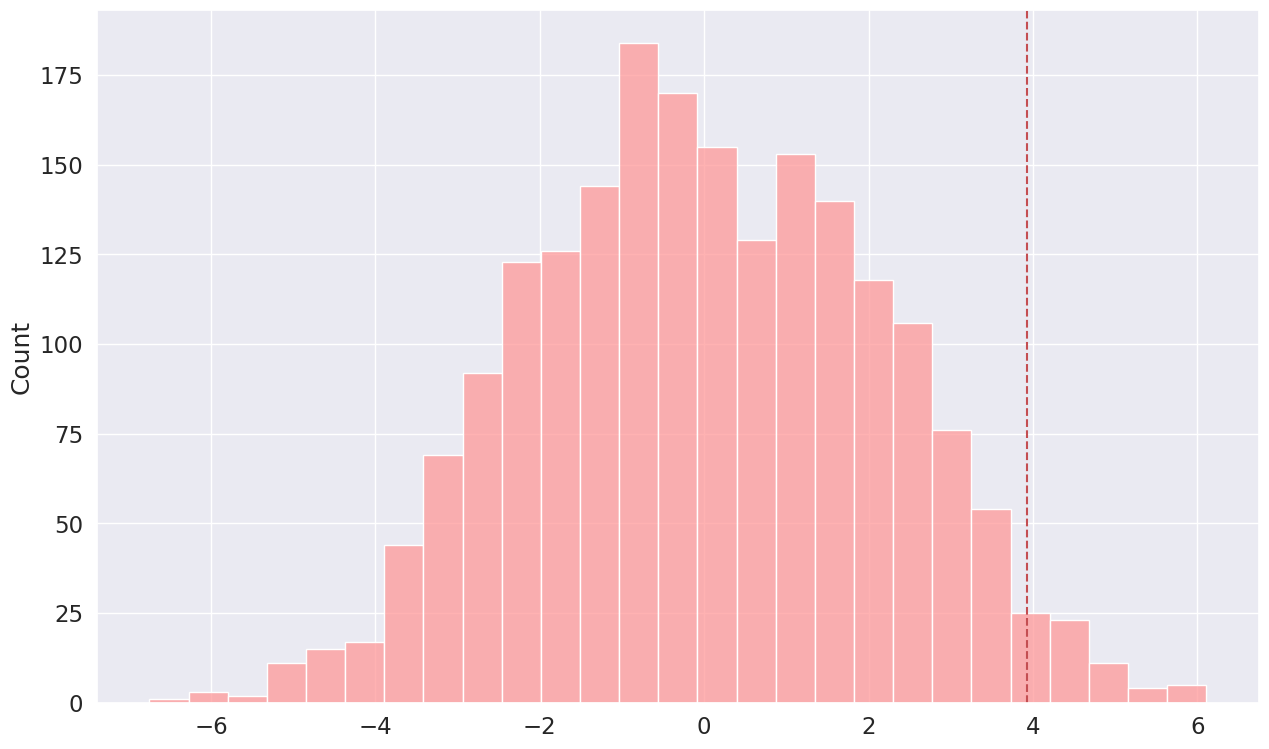

mu_diff: 3.93


In [ ]:
sns.histplot(mu_diff_samples, color='#ff9999')
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('mu_diff:', round(mu_diff, 2))

In [ ]:
# Calculate the number of values above the test statistic (mu_diff)
sum(mu_diff_samples>mu_diff)

np.int64(59)

In [ ]:
# calculate p value
p_value = sum(mu_diff_samples>mu_diff)/n
print('p-value: ', p_value)

p-value:  0.0295


In [ ]:
# Compare the test outcome with the significance level (alpha) defined above:
if p_value <= alpha:
  print("p-value <= alpha")
  print("H0 rejected → the observed result is statistically significant with ", 100-(alpha*100), "% confidence", sep="")
else:
  print("p-value > alpha")
  print("H0 accepted → the observed result is NOT statistically significant")

p-value <= alpha
H0 rejected → the observed result is statistically significant with 95.0% confidence


### Part 2

The `distributions.csv` dataset from the `data` folder contains data drawn from 6 probability distributions – one per column. Load it to a DataFrame named `distributions` and check its contents.

In [ ]:
distributions = pd.read_csv('/content/distributions.csv')
distributions

,distribution_1,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
0,False,100.004134,3.608307,890,1,-34,0.563827
1,False,100.008868,5.785856,897,1,-35,1.441859
2,False,100.004402,4.785344,898,3,-37,0.347664
3,False,100.000589,5.712047,890,0,-34,3.039330
4,False,100.017889,4.240379,898,1,-35,0.089587
...,...,...,...,...,...,...,...
995,False,100.017274,5.734047,903,2,-33,0.096619
996,False,100.012275,4.583540,891,2,-31,0.726007
997,False,100.000855,3.999458,888,1,-31,0.228308
998,False,100.005987,4.169784,882,1,-35,0.436532


1. Use the `.describe()` and `info()` methods on the `distributions` DataFrame to produce some preliminary information about each column. **What is the data type of each column?**

In [ ]:
distributions.describe()

,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,100.000263,3.462706,899.630000,1.192000,-34.539000,0.513223
std,0.010155,1.466874,9.729531,1.091938,2.889087,0.497540
min,99.961668,1.002417,865.000000,0.000000,-39.000000,0.000033
25%,99.993916,2.223423,893.000000,0.000000,-37.000000,0.141789
50%,100.000598,3.426250,900.000000,1.000000,-34.000000,0.362279
75%,100.007031,4.679788,906.000000,2.000000,-32.000000,0.735851
max,100.034052,5.997595,929.000000,6.000000,-30.000000,3.039330


In [ ]:
distributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distribution_1  1000 non-null   bool   
 1   distribution_2  1000 non-null   float64
 2   distribution_3  1000 non-null   float64
 3   distribution_4  1000 non-null   int64  
 4   distribution_5  1000 non-null   int64  
 5   distribution_6  1000 non-null   int64  
 6   distribution_7  1000 non-null   float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 48.0 KB


In [ ]:
print("The columns of the 'distributions' df have the following types:\n", distributions.dtypes, sep="")

The columns of the 'distributions' df have the following type:
distribution_1       bool
distribution_2    float64
distribution_3    float64
distribution_4      int64
distribution_5      int64
distribution_6      int64
distribution_7    float64
dtype: object


2. Loop through each column of `distributions` and for each column produce a plot to show the distribution.

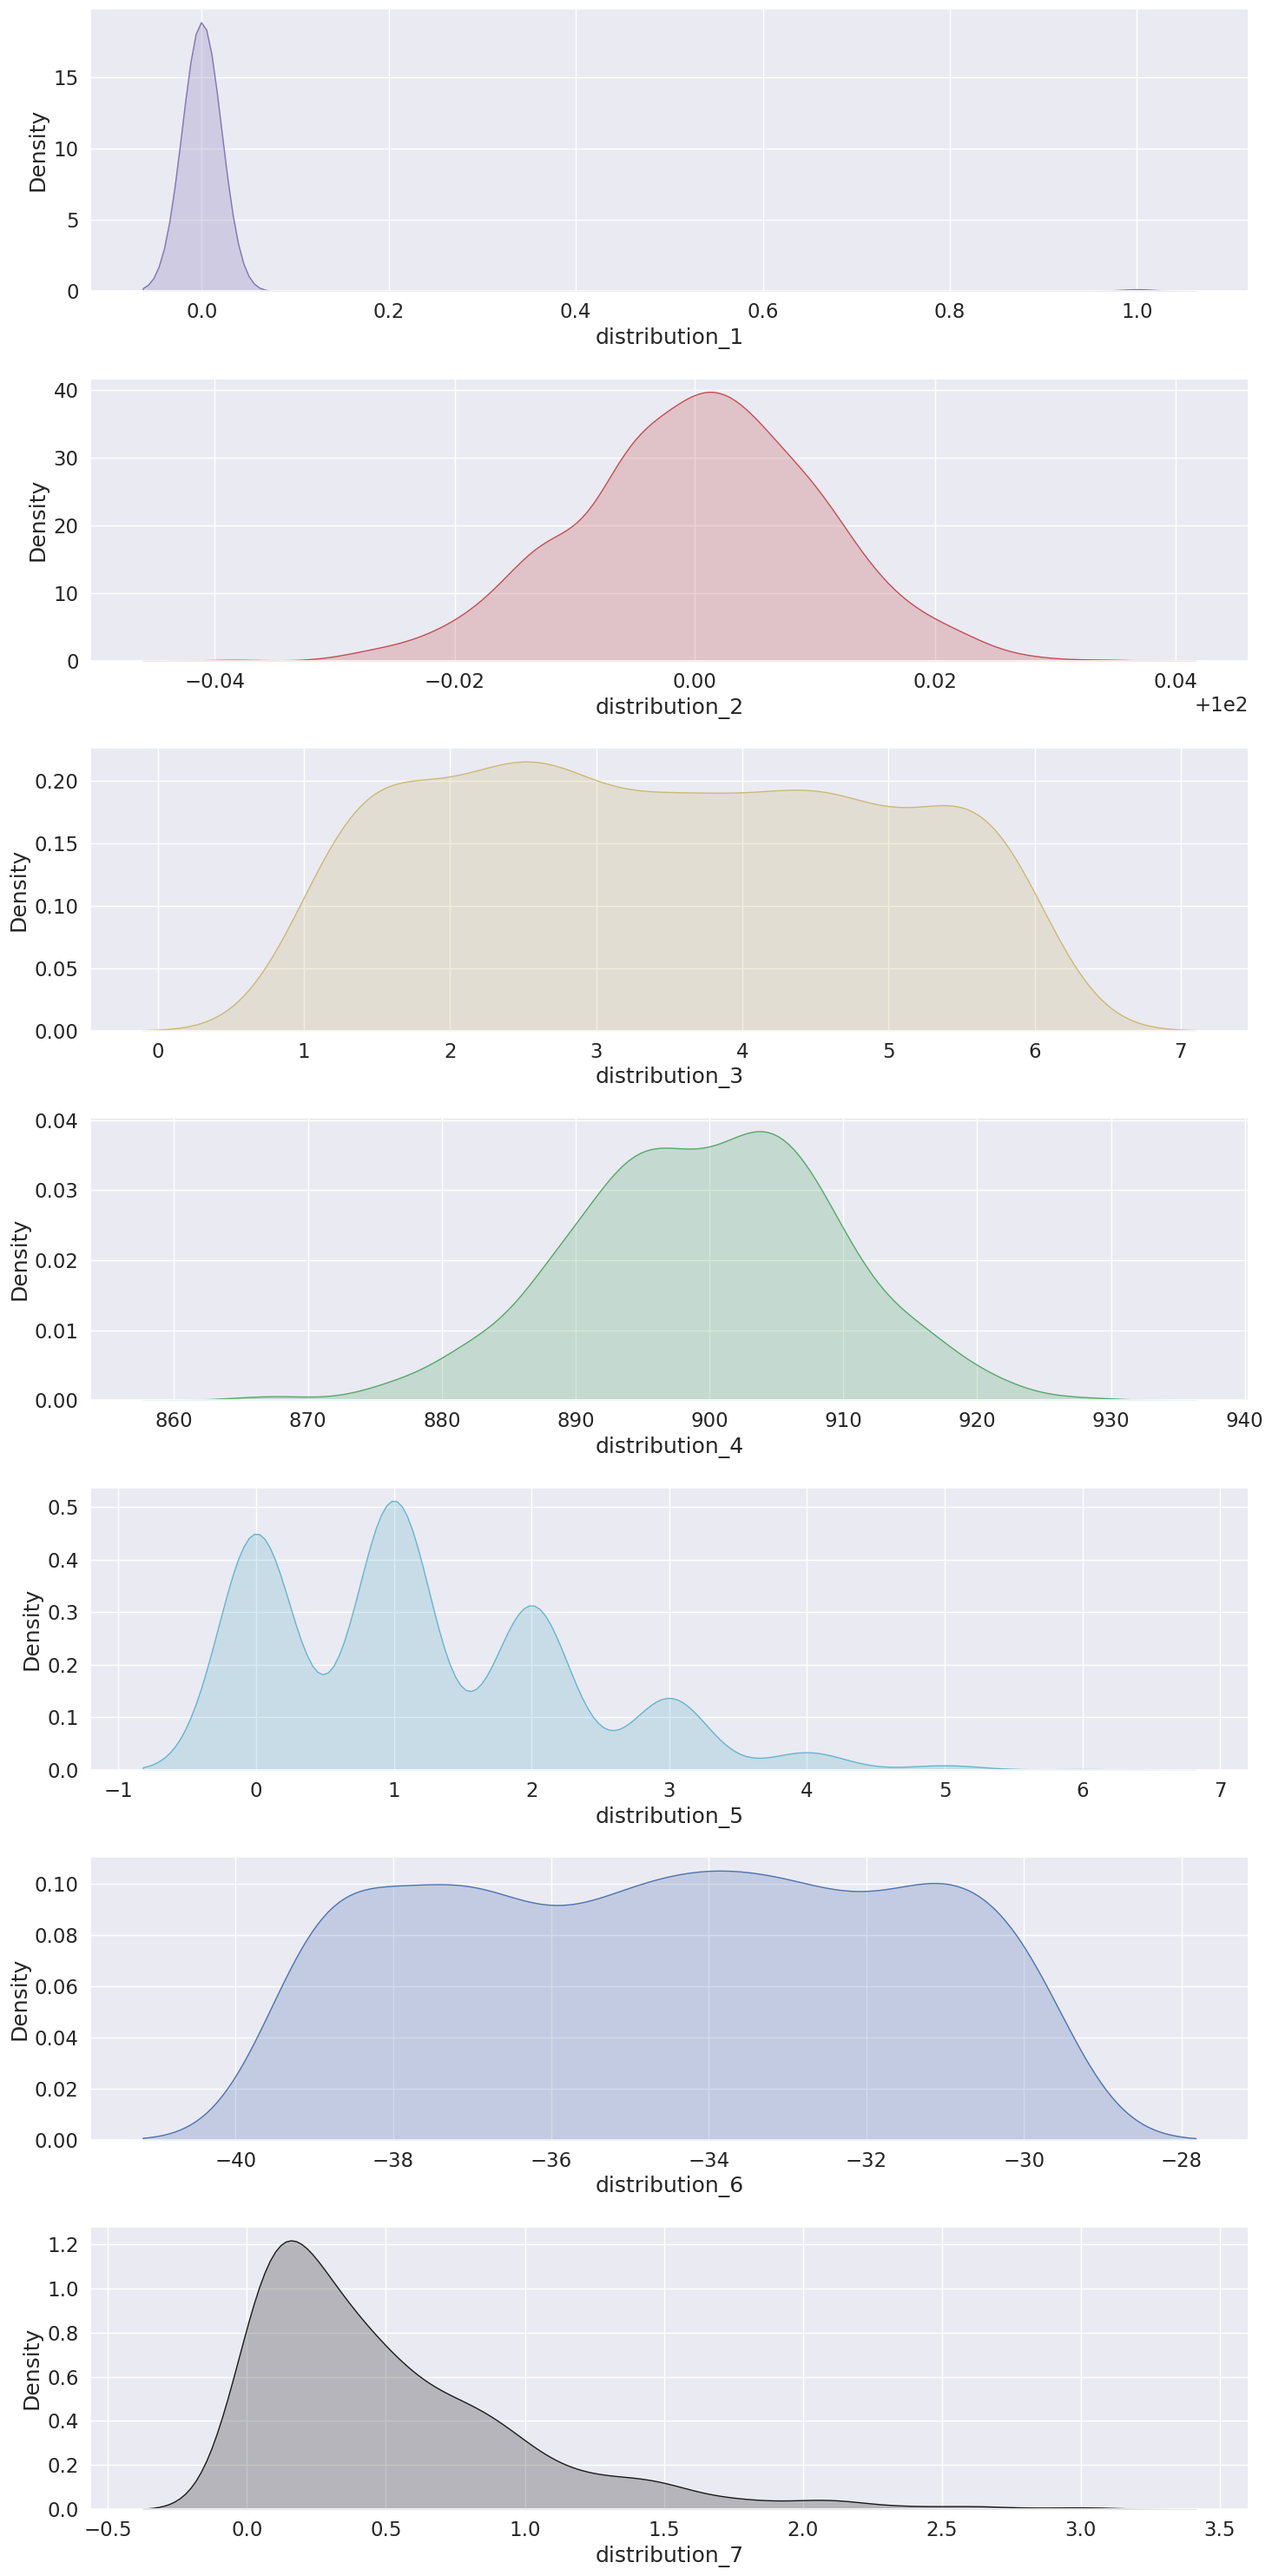

In [ ]:
# Set up the figure object (fig) and an array of axis objects (axes) which correspond to the individual plots.
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 30))
# Define a list of colors to be used in the for loop iterating among the elements
colors = ['m','r','y','g','c','b','k']
# Run a for loop for as many cycles as the number of elements in the list of columns in the 'distributions' df
for i in range(len(distributions.columns)):
  # Generate a plot with the 'i' distribution and place it in position 'i' of the figure with color 'i'
  sns.kdeplot(distributions[distributions.columns[i]], ax=axes[i], color=colors[i], fill=True)
# Make sure that titles and axis labels don't overlap
plt.tight_layout()
# Display the final image
plt.show()

3. Each column of the `distributions` dataframe contains data drawn from a different distribution. **Associate each column to its probability distribution.** This is the list of the probability distributions used (one for each column):
    - Bernoulli
    - Binomial
    - Continuous Uniform
    - Gaussian (Normal)
    - Discrete Uniform
    - Poisson
    - Exponential (this was not explain in classroom, go by exclusion)

In [ ]:
# Generate all the distributions in the list

# Bernoulli:
Bernoulli = np.random.binomial(n=1, p=0.5, size=1000)
# Binomial:
Binomial = np.random.binomial(n=1000, p=0.5, size=1000)
# Continuous Uniform:
Continuous_Uniform = np.random.uniform(low=0, high=10, size=1000)
# Gaussian (Normal):
Normal = np.random.normal(loc=0, scale=2, size=1000)
# Discrete Uniform:
Discrete_Uniform = np.random.randint(low=0, high=10, size=1000)
# Poisson:
Poisson = np.random.poisson(lam=1, size=1000)
# Exponential:
Exponential = np.random.exponential(scale=1, size=1000)

In [ ]:
# Combine all the distributions above in a dataframe, matching the order of the columns in 'distributions' df by type of distribution
distributions2 = pd.DataFrame({'Bernoulli': Bernoulli,
                                'Normal': Normal,
                                'Continuous_Uniform': Continuous_Uniform,
                                'Binomial': Binomial,
                                'Poisson': Poisson,
                                'Discrete_Uniform': Discrete_Uniform,
                                'Exponential': Exponential})
distributions2

,Bernoulli,Normal,Continuous_Uniform,Binomial,Poisson,Discrete_Uniform,Exponential
0,1,3.001674,4.049002,490,0,0,0.069238
1,0,1.060028,1.716411,490,1,1,0.762874
2,1,1.083821,4.615336,502,0,3,0.483711
3,1,-2.146300,1.709879,510,0,5,0.086576
4,1,-2.732982,2.770925,481,2,5,1.586380
...,...,...,...,...,...,...,...
995,0,-0.223606,3.790237,479,0,9,1.093707
996,1,-1.093326,8.992484,505,1,7,0.887276
997,0,1.683120,6.518300,510,1,2,0.659890
998,0,-0.906293,7.246470,520,1,1,0.240391


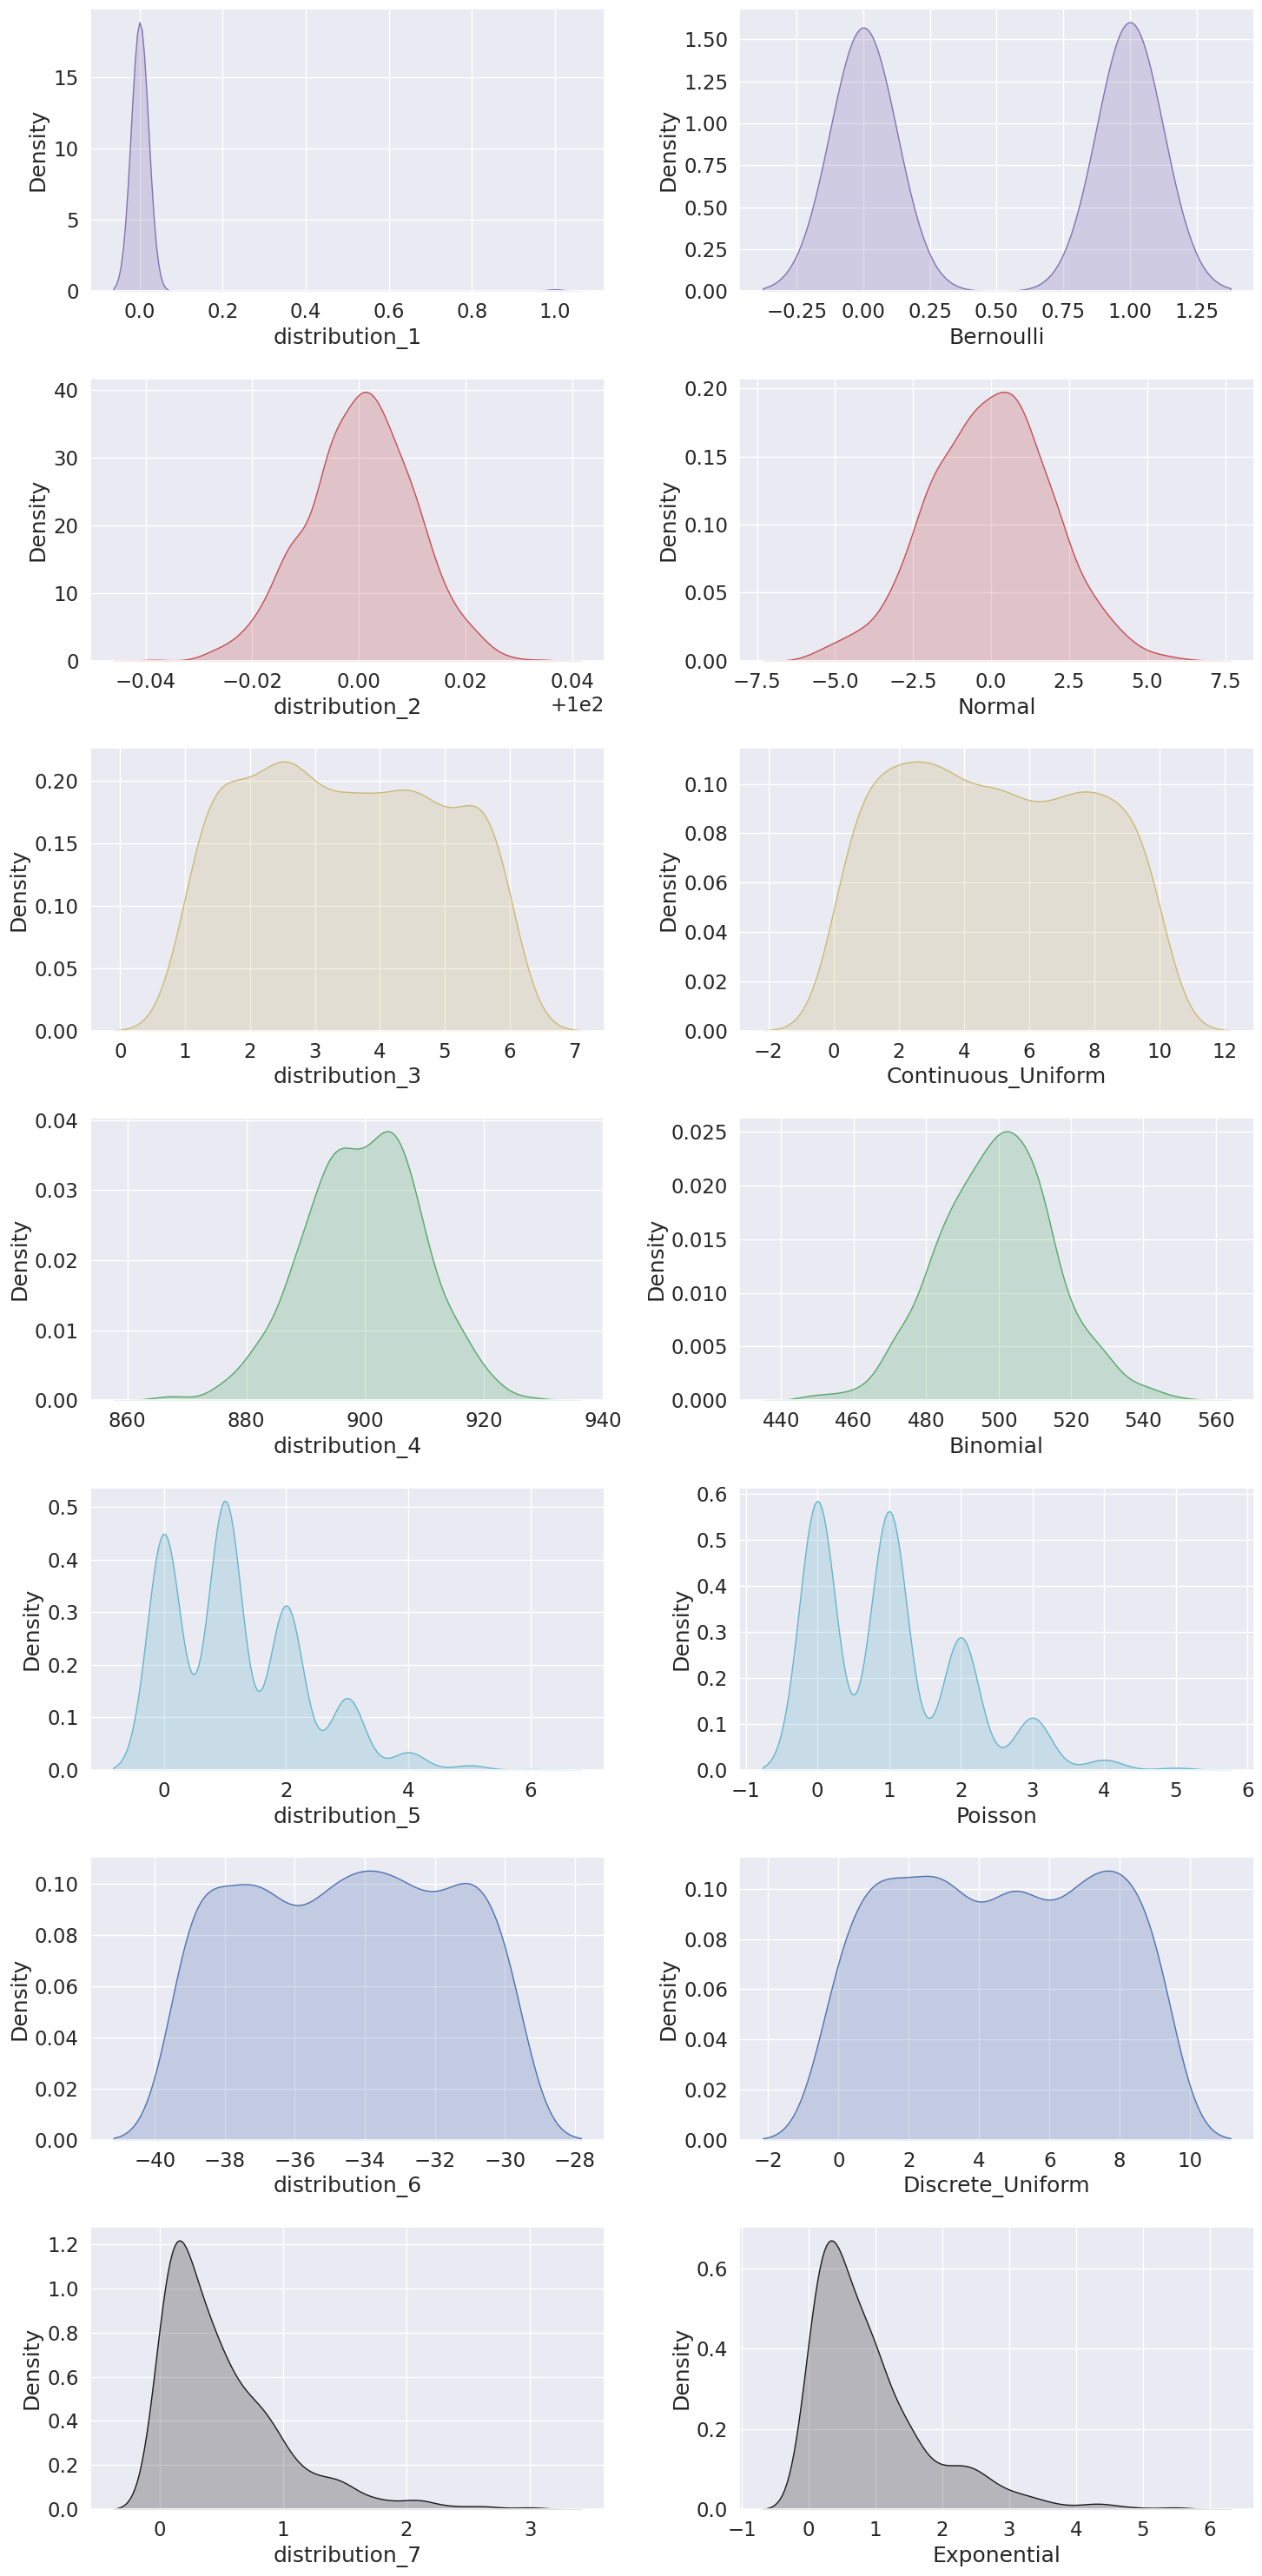

In [ ]:
# Repeat the steps from point 2. cycling through both df to match by row each distribution from 'distributions' df with the corresponding "model" distribution from 'distributions2' and have a visual confirmation.

# Set up the figure object (fig) and an array of axis objects (axes) which correspond to the individual plots.
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
# Define a list of colors to be used in the for loop iterating among the elements
colors = ['m','r','y','g','c','b','k']
# Run a for loop for as many cycles as the number of elements in the list of columns in the 'distributions' df
for i in range(len(distributions.columns)):
  # Generate a plot with the 'i' distribution and place it in position 'i' of the figure with color 'i'
  sns.kdeplot(distributions[distributions.columns[i]], ax=axes[i][0], color=colors[i], fill=True)
  sns.kdeplot(distributions2[distributions2.columns[i]], ax=axes[i][1], color=colors[i], fill=True)
# Make sure that titles and axis labels don't overlap
plt.tight_layout()
# Display the final image
plt.show()